# Lab1. # Graph Data Visualization with Python

Winter is Coming... 

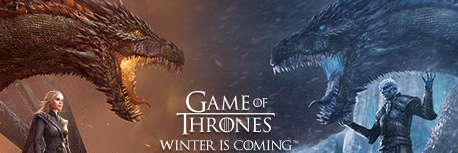

[Game of Thrones](https://www.imdb.com/title/tt0944947/) is the hugely popular television series based on the equally famous book series [`A Song of Ice and Fire` by George R.R](https://en.wikipedia.org/wiki/A_Song_of_Ice_and_Fire).

 Let's process & visualize ASAP some data (in different formats) from the **Game of Thrones datasets**.

## Task1. Kings battles visualization in Game of Thrones

In this task, we will need to analyze the co-occurrence network of the kings who participated in the same battles in the Game of Thrones. 

The *game-of-thrones-battles.csv* dataset stores history of the battles of [the War of the Five Kings](https://gameofthrones.fandom.com/wiki/War_of_the_Five_Kings).

We will build and visualize a directed graph where nodes are kings (attaking kings & defending kings) and the directed edges represent who is being attacked by whom (by participating in the same battle).

In [3]:
import pandas as pd
from pyvis.network import Network

First, load the *game-of-thrones-battles.csv* file into a Pandas DataFrame

In [4]:
#Loading the data
data = pd.read_csv("data/game-of-thrones-battles.csv")
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

Select required columns: *'name','attacker_king','defender_king','attacker_size','defender_size'*

In [6]:
battles_df=data.loc[:,['name','attacker_king','defender_king','attacker_size','defender_size']]
battles_df.head()

,name,attacker_king,defender_king,attacker_size,defender_size
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,NaN,120.0
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,18000.0,20000.0
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,1875.0,6000.0


In [7]:
battles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           38 non-null     object 
 1   attacker_king  36 non-null     object 
 2   defender_king  35 non-null     object 
 3   attacker_size  24 non-null     float64
 4   defender_size  19 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.6+ KB


In [8]:
#remove rows with any missing values (NaN)
battles_df_cleaned=battles_df.dropna()
battles_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 37
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           16 non-null     object 
 1   attacker_king  16 non-null     object 
 2   defender_king  16 non-null     object 
 3   attacker_size  16 non-null     float64
 4   defender_size  16 non-null     float64
dtypes: float64(2), object(3)
memory usage: 768.0+ bytes


In [9]:
battles_df_cleaned.head(3)

,name,attacker_king,defender_king,attacker_size,defender_size
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,18000.0,20000.0


Output names of attacking kings (without repetitions):

In [10]:
print(f"Attacking kings: {battles_df_cleaned.attacker_king.unique()}")

Attacking kings: ['Joffrey/Tommen Baratheon' 'Robb Stark' 'Stannis Baratheon']


Output names of defending kings (without repetitions):

In [11]:
print(f"Defending kings: {battles_df_cleaned.defender_king.unique()}")

Defending kings: ['Robb Stark' 'Joffrey/Tommen Baratheon' 'Balon/Euron Greyjoy'
 'Renly Baratheon' 'Mance Rayder']


Instantiate a *Network* object from *pyvis.network*. If working in a Jupyter Notebook environment, set the notebook parameter to True.

https://pyvis.readthedocs.io/en/latest/tutorial.html

In [ ]:
net5kings = Network(heading="Task1. Building Interactive Network of battles of the War of 5 Kings",
                bgcolor ="#242020",
                font_color = "white",
                height = "1000px",
                width = "100%",
                directed = True, # we have directed graph
                notebook=True,
                cdn_resources = "remote"
                
) # do this

Define nodes - the list of unique names of all kings. Hint: use Python *set* to avoid repetitions.

In [126]:
nodes=set(battles_df_cleaned.attacker_king.unique().tolist()+battles_df_cleaned.defender_king.unique().tolist())
print(f"Kings list (nodes names): {nodes}")

Kings list (nodes names): {'Mance Rayder', 'Joffrey/Tommen Baratheon', 'Balon/Euron Greyjoy', 'Robb Stark', 'Stannis Baratheon', 'Renly Baratheon'}


Add nodes to the graph. Output them via *net5kings.nodes* after that.

In [ ]:
# add the nodes
net5kings.add_nodes(nodes)
print(f"Nodes of net5kings properties: {net5kings.nodes}")

Nodes of net5kings properties: [{'color': '#97c2fc', 'id': 'Mance Rayder', 'label': 'Mance Rayder', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'id': 'Joffrey/Tommen Baratheon', 'label': 'Joffrey/Tommen Baratheon', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'id': 'Balon/Euron Greyjoy', 'label': 'Balon/Euron Greyjoy', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'id': 'Robb Stark', 'label': 'Robb Stark', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'id': 'Stannis Baratheon', 'label': 'Stannis Baratheon', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'id': 'Renly Baratheon', 'label': 'Renly Baratheon', 'shape': 'dot', 'font': {'color': 'white'}}]


Define potential edges as (*king1_name, king2_name*) from *battles_df_cleaned* by using data in ['attacker_king','defender_king'] columns
where:
* king1_name - attacking king
* king2_name - defending king

In [128]:
edges = battles_df_cleaned.loc[:,['attacker_king','defender_king']].values.tolist()
print("Potential Edges of net5kings:")
for edge in edges:
    print(edge)

Potential Edges of net5kings:
['Joffrey/Tommen Baratheon', 'Robb Stark']
['Joffrey/Tommen Baratheon', 'Robb Stark']
['Robb Stark', 'Joffrey/Tommen Baratheon']
['Robb Stark', 'Joffrey/Tommen Baratheon']
['Robb Stark', 'Joffrey/Tommen Baratheon']
['Robb Stark', 'Balon/Euron Greyjoy']
['Joffrey/Tommen Baratheon', 'Robb Stark']
['Robb Stark', 'Joffrey/Tommen Baratheon']
['Stannis Baratheon', 'Renly Baratheon']
['Joffrey/Tommen Baratheon', 'Robb Stark']
['Robb Stark', 'Joffrey/Tommen Baratheon']
['Stannis Baratheon', 'Joffrey/Tommen Baratheon']
['Joffrey/Tommen Baratheon', 'Robb Stark']
['Stannis Baratheon', 'Mance Rayder']
['Stannis Baratheon', 'Balon/Euron Greyjoy']
['Stannis Baratheon', 'Joffrey/Tommen Baratheon']


Create the list (set) of real edges (without repetitions) based on potential edges defined earlie.

In [129]:
unique_edges = set(set(tuple(sublist) for sublist in edges))
print(f"Real (unique) directed Edges of net5kings:")
for edge in unique_edges:
    print(edge)



Real (unique) directed Edges of net5kings:
('Stannis Baratheon', 'Mance Rayder')
('Stannis Baratheon', 'Joffrey/Tommen Baratheon')
('Stannis Baratheon', 'Renly Baratheon')
('Robb Stark', 'Balon/Euron Greyjoy')
('Joffrey/Tommen Baratheon', 'Robb Stark')
('Stannis Baratheon', 'Balon/Euron Greyjoy')
('Robb Stark', 'Joffrey/Tommen Baratheon')


Calculate edges weights as the total number of battles between *king1* and *king2*, where *(king1,king2)*- an edge. **Hint**: use [groupby with 2 columns](https://www.geeksforgeeks.org/pandas/pandas-group-by-multiple-columns/) and *count()*.

In [130]:
edges_w=battles_df_cleaned.groupby(['attacker_king','defender_king'])['name'].count()
edges_w


attacker_king             defender_king           
Joffrey/Tommen Baratheon  Robb Stark                  5
Robb Stark                Balon/Euron Greyjoy         1
                          Joffrey/Tommen Baratheon    5
Stannis Baratheon         Balon/Euron Greyjoy         1
                          Joffrey/Tommen Baratheon    2
                          Mance Rayder                1
                          Renly Baratheon             1
Name: name, dtype: int64

Define the *titles* for edges by using data from *battles_df_cleaned* about battles' *name, attacker_size, and defender_size*.

To join strings within groups in a Pandas DataFrame using *groupby()*, the *agg()* or *apply()* methods can be used in conjunction with the *str.join()* method.

Hint: use Pandas  .loc with multiple conditional (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), *.tolist()* - to transform values from dataframe slice to list.

In [131]:
edges_titles=battles_df_cleaned.groupby(['attacker_king','defender_king'])['name'].agg(', '.join)
edges_titles

attacker_king             defender_king           
Joffrey/Tommen Baratheon  Robb Stark                  Battle of the Golden Tooth, Battle of Riverrun...
Robb Stark                Balon/Euron Greyjoy                                Battle of Torrhen's Square
                          Joffrey/Tommen Baratheon    Battle of the Green Fork, Battle of the Whispe...
Stannis Baratheon         Balon/Euron Greyjoy                                Retaking of Deepwood Motte
                          Joffrey/Tommen Baratheon        Battle of the Blackwater, Siege of Winterfell
                          Mance Rayder                                           Battle of Castle Black
                          Renly Baratheon                                          Siege of Storm's End
Name: name, dtype: object

Assign the weight of each edge and output them as follows:

In [132]:
#values = [int(edges_w[index]) for index in unique_edges]
edges_weights=[]
for index in unique_edges:
    print(f"Attackin king: {index[0]}, Defending king: {index[1]}, N of battles: {edges_w[index]}, battles: {edges_titles[index]}")
    edges_weights.append(int(edges_w[index]))
    
print(f"edges_weights: {edges_weights}")


Attackin king: Stannis Baratheon, Defending king: Mance Rayder, N of battles: 1, battles: Battle of Castle Black
Attackin king: Stannis Baratheon, Defending king: Joffrey/Tommen Baratheon, N of battles: 2, battles: Battle of the Blackwater, Siege of Winterfell
Attackin king: Stannis Baratheon, Defending king: Renly Baratheon, N of battles: 1, battles: Siege of Storm's End
Attackin king: Robb Stark, Defending king: Balon/Euron Greyjoy, N of battles: 1, battles: Battle of Torrhen's Square
Attackin king: Joffrey/Tommen Baratheon, Defending king: Robb Stark, N of battles: 5, battles: Battle of the Golden Tooth, Battle of Riverrun, Sack of Winterfell, Battle of the Fords, The Red Wedding
Attackin king: Stannis Baratheon, Defending king: Balon/Euron Greyjoy, N of battles: 1, battles: Retaking of Deepwood Motte
Attackin king: Robb Stark, Defending king: Joffrey/Tommen Baratheon, N of battles: 5, battles: Battle of the Green Fork, Battle of the Whispering Wood, Battle of the Camps, Battle of O

Add edges with their weigths to the net5kings (via *.add_edge*) and output results as follows:

In [143]:
for index, edge in enumerate(unique_edges):
    net5kings.add_edge(edge[0],edge[1], value=int(edges_w[edge]), title=edges_titles[edge], arrows='to')   
    #net5kings.add_edge(from=edge[0],to=edge[1], weight=edges_w[edge], arrows='to,from')
    print(f"The edge from {edge[0]} to {edge[1]} with weight {edges_w[edge]}, title: '{edges_titles[edge]}' was added")

    
    #net5kings.add_edge(edge[0],edge[1], weight=int(edges_w[index]))

The edge from Stannis Baratheon to Mance Rayder with weight 1, title: 'Battle of Castle Black' was added
The edge from Stannis Baratheon to Joffrey/Tommen Baratheon with weight 2, title: 'Battle of the Blackwater, Siege of Winterfell' was added
The edge from Stannis Baratheon to Renly Baratheon with weight 1, title: 'Siege of Storm's End' was added
The edge from Robb Stark to Balon/Euron Greyjoy with weight 1, title: 'Battle of Torrhen's Square' was added
The edge from Joffrey/Tommen Baratheon to Robb Stark with weight 5, title: 'Battle of the Golden Tooth, Battle of Riverrun, Sack of Winterfell, Battle of the Fords, The Red Wedding' was added
The edge from Stannis Baratheon to Balon/Euron Greyjoy with weight 1, title: 'Retaking of Deepwood Motte' was added
The edge from Robb Stark to Joffrey/Tommen Baratheon with weight 5, title: 'Battle of the Green Fork, Battle of the Whispering Wood, Battle of the Camps, Battle of Oxcross, Sack of Harrenhal' was added


In [144]:
net5kings.edges

[{'value': 1,
  'title': 'Battle of Castle Black',
  'arrows': 'to',
  'from': 'Stannis Baratheon',
  'to': 'Mance Rayder'},
 {'value': 2,
  'title': 'Battle of the Blackwater, Siege of Winterfell',
  'arrows': 'to',
  'from': 'Stannis Baratheon',
  'to': 'Joffrey/Tommen Baratheon'},
 {'value': 1,
  'title': "Siege of Storm's End",
  'arrows': 'to',
  'from': 'Stannis Baratheon',
  'to': 'Renly Baratheon'},
 {'value': 1,
  'title': "Battle of Torrhen's Square",
  'arrows': 'to',
  'from': 'Robb Stark',
  'to': 'Balon/Euron Greyjoy'},
 {'value': 5,
  'title': 'Battle of the Golden Tooth, Battle of Riverrun, Sack of Winterfell, Battle of the Fords, The Red Wedding',
  'arrows': 'to',
  'from': 'Joffrey/Tommen Baratheon',
  'to': 'Robb Stark'},
 {'value': 1,
  'title': 'Retaking of Deepwood Motte',
  'arrows': 'to',
  'from': 'Stannis Baratheon',
  'to': 'Balon/Euron Greyjoy'},
 {'value': 5,
  'title': 'Battle of the Green Fork, Battle of the Whispering Wood, Battle of the Camps, Battle o

Assign the value of node (to scale the node's size) as the N of kings (N+ 1) that this king (a node) has attacked in battles. **Hint**: use *.get_adj_list()* (enemies_map) to retrieve an adjacency list epresentation of the directed graph

In [145]:
enemies_map = net5kings.get_adj_list()
enemies_map

{'Mance Rayder': set(),
 'Joffrey/Tommen Baratheon': {'Robb Stark'},
 'Balon/Euron Greyjoy': set(),
 'Robb Stark': {'Balon/Euron Greyjoy', 'Joffrey/Tommen Baratheon'},
 'Stannis Baratheon': {'Balon/Euron Greyjoy',
  'Joffrey/Tommen Baratheon',
  'Mance Rayder',
  'Renly Baratheon'},
 'Renly Baratheon': set()}

By using enemies_map (defined earlie) output the following:

In [146]:
for king, enemies in enemies_map.items():
    print(f"King: {king} has attacked: {enemies}, N of enemies: {len(enemies)}, node's value: {1+len(enemies)}")

King: Mance Rayder has attacked: set(), N of enemies: 0, node's value: 1
King: Joffrey/Tommen Baratheon has attacked: {'Robb Stark'}, N of enemies: 1, node's value: 2
King: Balon/Euron Greyjoy has attacked: set(), N of enemies: 0, node's value: 1
King: Robb Stark has attacked: {'Balon/Euron Greyjoy', 'Joffrey/Tommen Baratheon'}, N of enemies: 2, node's value: 3
King: Stannis Baratheon has attacked: {'Balon/Euron Greyjoy', 'Mance Rayder', 'Renly Baratheon', 'Joffrey/Tommen Baratheon'}, N of enemies: 4, node's value: 5
King: Renly Baratheon has attacked: set(), N of enemies: 0, node's value: 1


Use the following color dictionary to assign a *color* to a node according to its *value* (specified earlier):

In [138]:
nodeColors={
    0:"blue",
    1: "green",
    2: "orange",
    3: "purple",
    4: "gold",
    5:"red"
}

Assign *values* and *color* to nodes. Output results via *net5kings.nodes*

In [147]:
for node in net5kings.nodes:
    node["value"] = len(enemies_map[node["id"]])+1
    node["color"]=nodeColors[len(enemies_map[node["id"]])+1]

In [148]:
net5kings.nodes

[{'color': 'green',
  'id': 'Mance Rayder',
  'label': 'Mance Rayder',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 1},
 {'color': 'orange',
  'id': 'Joffrey/Tommen Baratheon',
  'label': 'Joffrey/Tommen Baratheon',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 2},
 {'color': 'green',
  'id': 'Balon/Euron Greyjoy',
  'label': 'Balon/Euron Greyjoy',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 1},
 {'color': 'purple',
  'id': 'Robb Stark',
  'label': 'Robb Stark',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 3},
 {'color': 'red',
  'id': 'Stannis Baratheon',
  'label': 'Stannis Baratheon',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 5},
 {'color': 'green',
  'id': 'Renly Baratheon',
  'label': 'Renly Baratheon',
  'shape': 'dot',
  'font': {'color': 'white'},
  'value': 1}]

Display the graph

In [149]:
net5kings.show("Lab1-task1-net5kings.html", notebook=False)

Lab1-task1-net5kings.html


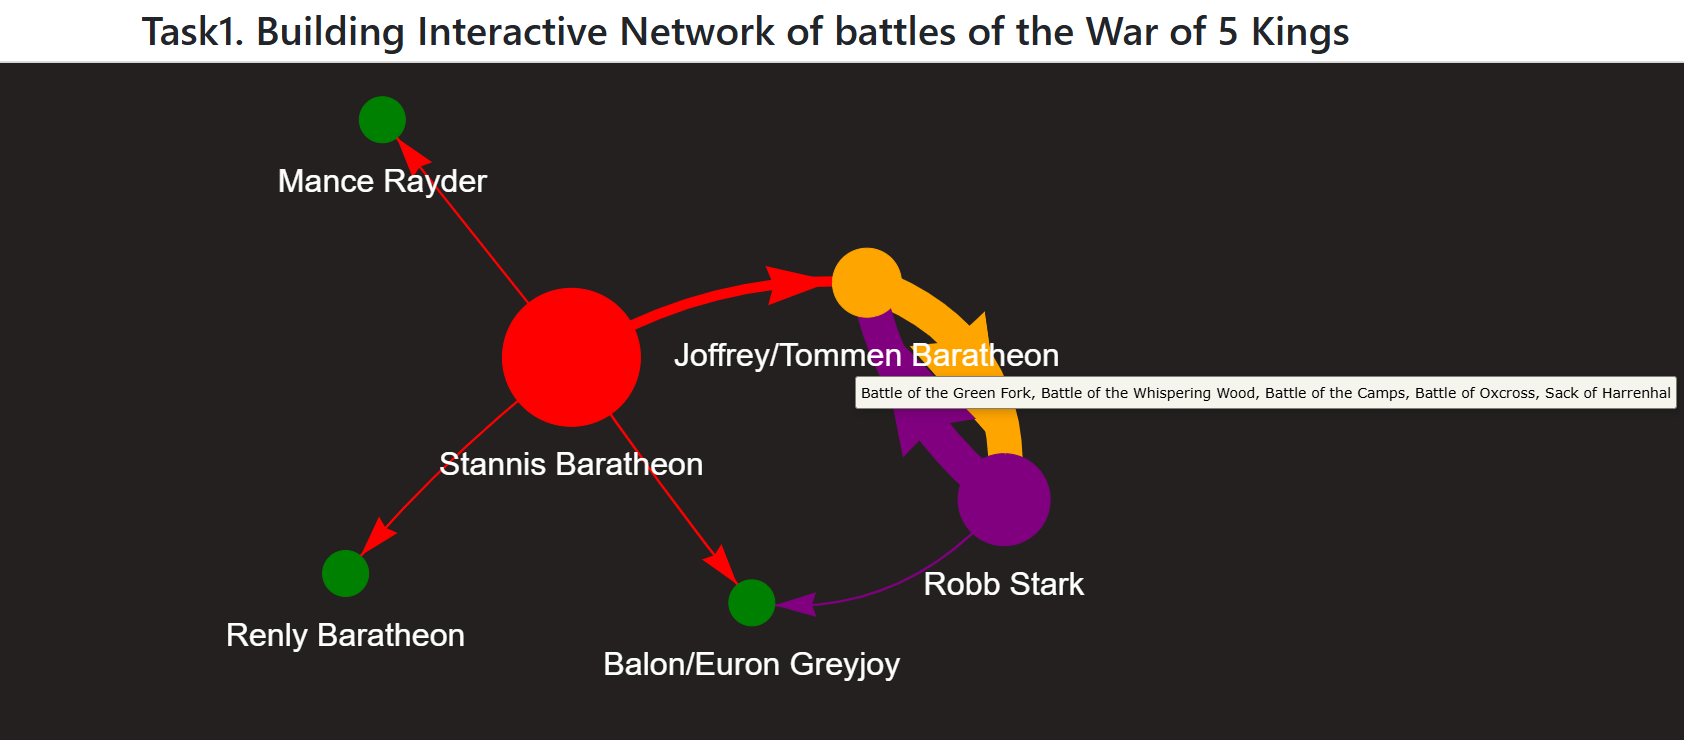

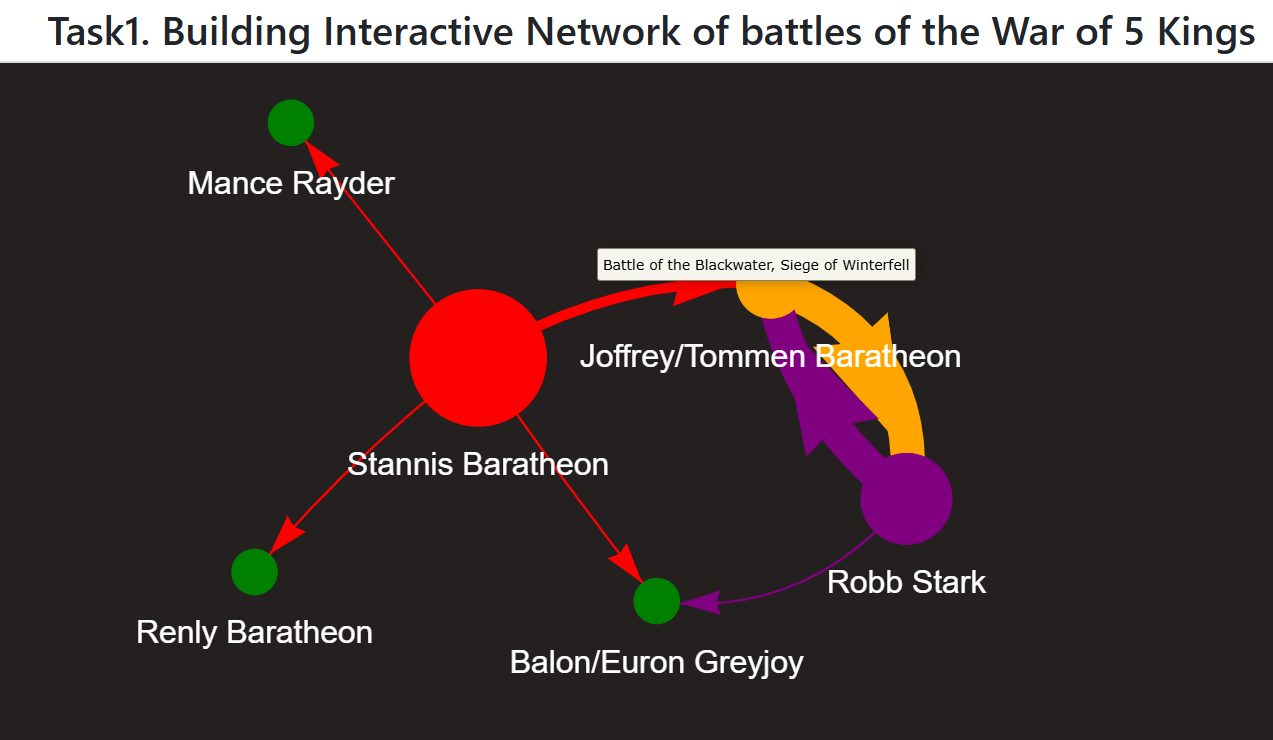